In [9]:
import numpy as np
from bandits import ConversionRate, Demand, ThompsonSampling
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
treatment1 = ConversionRate(0, 1, 1)
treatment2 = ConversionRate(1, 1, 1)
treatment3 = ConversionRate(2, 1, 1)

In [11]:
true_rates = [0.1, 0.3, 0.5]

In [12]:
bandits = [treatment1, treatment2, treatment3]

ts = ThompsonSampling()
for b in bandits:
    ts.add_bandit(b)

In [13]:
rewards = []
num_samples = 5000
for i in range(num_samples):
    bandit, bandit_index = ts.get_bandit()
    
    outcome = np.random.binomial(n=1, p=true_rates[bandit.name], size=1)
    rewards.append(outcome)
    
    ts.update(bandit, outcome)

Text(0.5, 1.0, 'Thompson Sampling Cumulative Reward Convergence')

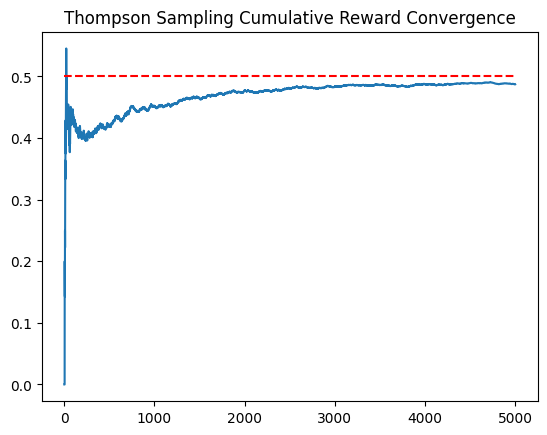

In [14]:
sns.lineplot(x=np.arange(1, num_samples+1), y=np.cumsum(rewards) / np.arange(1, num_samples+1))
plt.hlines(0.5, xmin=0, xmax=num_samples, colors='r', linestyles='dashed')
plt.title("Thompson Sampling Cumulative Reward Convergence")

In [15]:
ts.get_bandit()

(Conversion Rate: '2' (alpha:[2429], beta:[2524]), 2)